<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-2-phase-2-ajak-cp/blob/main/DATA_301_Lab_2A_Ava_Jakusovszky%2C_Daniel_Kim%2C_Eugenia_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [1]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `https://dlsun.github.io/pods/data/sharktank.csv`. Read in the data into a Pandas `DataFrame`.



In [2]:
import pandas as pd
df_shark = pd.read_csv("https://dlsun.github.io/pods/data/sharktank.csv")
df_shark.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [3]:
df_shark['Corcoran'] = df_shark['Corcoran'].fillna(0)
df_shark['Cuban'] = df_shark['Cuban'].fillna(0)
df_shark['Greiner'] = df_shark['Greiner'].fillna(0)
df_shark['Herjavec'] = df_shark['Herjavec'].fillna(0)
df_shark['John'] = df_shark['John'].fillna(0)
df_shark["O'Leary"] = df_shark["O'Leary"].fillna(0)
df_shark['Harrington'] = df_shark['Harrington'].fillna(0)
df_shark['Guest'] = df_shark['Guest'].fillna(0)
df_shark.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [4]:
import numpy as np
df_shark["Amount"] = df_shark["Amount"].replace('[\$\,\.]',"",regex=True).astype(float)
df_shark["Equity"] = df_shark["Equity"].replace('[\%\,\.]',"",regex=True).astype(float)
df_shark["Equity"] = df_shark["Equity"].div(100).round(2)
df_shark["Equity"].replace(0.00,np.nan, inplace=True)
# df_shark.loc[[312]]

## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [5]:
df_shark['Valuation'] = df_shark['Amount']/df_shark['Equity']
# df_shark['Valuation'].idxmax()
df_shark.iloc[df_shark['Valuation'].idxmax()]


Season                                                                 6
No. in series                                                         11
Company                                                             Zipz
Deal                                                                 Yes
Industry                                               Food and Beverage
Entrepreneur Gender                                                 Male
Amount                                                           2.5e+06
Equity                                                               0.1
Corcoran                                                               0
Cuban                                                                  0
Greiner                                                                0
Herjavec                                                               0
John                                                                   0
O'Leary                                            

In [6]:
df_shark.iloc[df_shark['Amount'].idxmax()]

Season                                                                 6
No. in series                                                         27
Company                                                           AirCar
Deal                                                                 Yes
Industry                                                 Green/CleanTech
Entrepreneur Gender                                                 Male
Amount                                                             5e+06
Equity                                                               0.5
Corcoran                                                               0
Cuban                                                                  0
Greiner                                                                0
Herjavec                                                               1
John                                                                   0
O'Leary                                            

AirCar recieved the most initial amount, but HyConn had the highest valuation.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [7]:
col = df_shark.columns.values.tolist()
col.remove('Season')
col.remove('No. in series')
col.remove('Company')
col.remove('Deal')
col.remove('Industry')
col.remove('Entrepreneur Gender')
col.remove('Amount')
col.remove('Equity')
col.remove('Details / Notes')
col.remove('Valuation')
col
df_shark["Number of Sharks"] = df_shark[col].sum(axis=1)
# df_shark.head()

In [8]:
df_deal = df_shark[df_shark['Deal']=='Yes']
# df_deal.head()

In [9]:
df_shark.head()


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes,Valuation,Number of Sharks
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,0.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,90909.090909,1.0
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,920000.000000,2.0
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [10]:
df_shark['Amount Per Shark'] = df_shark['Amount']/df_shark['Number of Sharks']
df_shark.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes,Valuation,Number of Sharks,Amount Per Shark
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,0.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,90909.090909,1.0,50000.0
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,920000.000000,2.0,230000.0
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN


In [11]:
df_the_sharks = df_shark[['Corcoran','Cuban','Greiner','Herjavec','John',"O'Leary",'Harrington','Guest','Amount Per Shark']]
df_the_sharks[['Corcoran','Cuban','Greiner','Herjavec','John',"O'Leary",'Harrington','Guest']].multiply(df_the_sharks['Amount Per Shark'], axis='index').sum()


Corcoran       4912500.0
Cuban         17817500.0
Greiner        8170000.0
Herjavec      16297500.0
John           8154000.0
O'Leary        7952500.0
Harrington      800000.0
Guest           400000.0
dtype: float64

In [12]:
# # df_shark['Amount Per Shark'] = df_shark['Amount']/df_shark['Number of Sharks']
# namelist = ['Corcoran','Cuban','Greiner','Herjavec','John',"O'Leary",'Harrington','Guest']
# max = 0
# person = ''
# for i in namelist:
#   num = df_shark.loc[df_shark[i]==1.0, 'Amount Per Shark'].sum()
#   if num>max:
#     max = num
#     person = i
# print(person+ ' invested the most. They invested $' + str(max) + ' total.')

# #amt per shark times, every row divide by first second, line by line


**YOUR EXPLANATION HERE**

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

In [13]:
df_shark['Industry'].value_counts()

Food and Beverage        104
Fashion / Beauty          93
Lifestyle / Home          70
Children / Education      55
Fitness / Sports          40
Software / Tech           33
Consumer Products         19
Healthcare                18
Pet Products              17
Business Services         13
Uncertain / Other         13
Media / Entertainment     11
Green/CleanTech            9
Name: Industry, dtype: int64

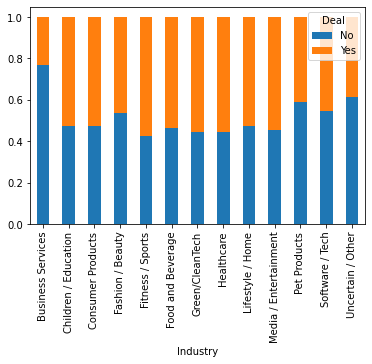

In [14]:
joint = pd.crosstab(df_shark['Deal'],df_shark['Industry'], normalize = True)
ind = joint.sum(axis=0)
con = joint.divide(ind,axis=1)
con
con.T.plot.bar(stacked=True)
# GROUP BY AN SUMM IS HOW MUCH money not yes or no
# df_shark.groupby("")["tip_percent"].plot.density(
#         legend=True,
#         xlim=(0, .6)
#     )

Based on the conditional bar plot, investors were fairly equal in their offerings, minus a low deal rate for Business Services industry.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2A - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.